# EDA for CB513 Dataset
Goal: Perform exploratory data analysis (EDA) on the CB513 dataset to understand the dataset format and the frequency of secondary structure elements in the dataset.

In [ ]:
# Import necessary libraries
import gzip
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
# Instalasi Pustaka lainnya
%pip install biopython
%pip install matplotlib
%pip install seaborn
%sudo apt install cmake

# Instalasi Pustaka DSSP
%git clone https://github.com/PDB-REDO/dssp.git
%cd dssp
%cmake -S . -B build
%cmake --build build
%cmake --install build

In [2]:
# Load cb513 data from compressed numpy file
f = gzip.GzipFile('../Data/Original/cb513+profile_split1.npy.gz', "r")
cb513 = np.load(f)
f.close()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6708\2732464637.py:3: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  cb513 = np.load(f)


In [3]:
print(cb513.shape)

(514, 39900)


In [4]:
# convert all to 700 x 57
cb513_reshaped = cb513.reshape((514, 700, 57))
print(cb513_reshaped.shape)

(514, 700, 57)


In [5]:
# visualize the reshaped data
print(cb513_reshaped[0])
print(cb513_reshaped[0].shape)

[[0.         0.         0.         ... 0.26894142 0.9234378  0.        ]
 [0.         0.         0.         ... 0.11920292 0.00919371 0.        ]
 [0.         0.         0.         ... 0.5        0.02508696 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
(700, 57)


In [6]:
# for the first protein print separated features and labels
'''The 57 features are:
[0,22): amino acid residues, with the order of 'A', 'C', 'E', 'D', 'G', 'F', 'I', 'H', 'K', 'M', 'L', 'N', 'Q', 'P', 'S', 'R', 'T', 'W', 'V', 'Y', 'X', 'NoSeq'
[22,31): Secondary structure labels, with the sequence of 'L', 'B', 'E', 'G', 'I', 'H', 'S', 'T', 'NoSeq'
[31,33): N- and C- terminals;
[33,35): relative and absolute solvent accessibility, used only for training. (absolute accessibility is thresholded at 15; relative accessibility is normalized by the largest accessibility value in a protein and thresholded at 0.15; original solvent accessibility is computed by DSSP)
[35,57): sequence profile. Note the order of amino acid residues is ACDEFGHIKLMNPQRSTVWXY and it is different from the order for amino acid residues
'''
# first protein = p
p = cb513_reshaped[0]

In [7]:
# crop the array for amino acid residues
aa_residues = p[:, 0:22]
print(aa_residues)
print(aa_residues.shape)
print(np.argmax(aa_residues, axis=1))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
(700, 22)
[18 13 14 10  0 16  6 14 10  2 11 14 17 14  4 10 14  8 12  6 12 10  0 12
  4 11 11  4  6  5 15 16 13  6 18 10 18  3 11  8  4 11 15 18 12  6 16 11
 18 16 14  8 18 18 16 14 11  6 12 10 10 10 11 16 15 11  6 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 

In [8]:
# crop the array for secondary structure labels
sec_structure = p[:, 22:31]
print(sec_structure)
print(sec_structure.shape)
print(np.argmax(sec_structure, axis=1))

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
(700, 9)
[0 0 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 7 7 7 7 7 2 2 2 2 2 2 2 2 0
 0 6 6 6 6 0 2 2 2 2 2 7 7 6 5 5 5 5 5 7 1 0 0 1 0 0 3 3 3 0 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8

In [9]:
# crop the array for N- and C- terminals
terminals = p[:, 31:33]
print(terminals)
print(terminals.shape)
print(np.argmax(terminals, axis=1))

[[1. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(700, 2)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [10]:
# crop the array for relative and absolute solvent accessibility
solvent_accessibility = p[:, 33:35]
print(solvent_accessibility)
print(solvent_accessibility.shape)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(700, 2)


In [11]:
# crop the array for sequence profile
sequence_profile = p[:, 35:57]
print(sequence_profile)
print(sequence_profile.shape)
print(np.argmax(sequence_profile, axis=1))

[[0.21416502 0.17079548 0.02297737 ... 0.26894142 0.9234378  0.        ]
 [0.0831727  0.01045671 0.04228977 ... 0.11920292 0.00919371 0.        ]
 [0.34751054 0.0253327  0.9945137  ... 0.5        0.02508696 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
(700, 22)
[ 9 12  2 12  0 10  7 15  9  3 11 11 18  5  8  9 15  8 13  7 13 14  0 13
 15 11 13  5 17  4 12 11 12 17 13  9 13 11  3 11  5  3 12 18  7 17  2 11
 17  2  6 12 17 17 16 16 11  7  0  9 10  9 20 14  1 11  7 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 2

In [12]:
# print the length of the protein ignoring the padding
length = len(np.where(np.argmax(aa_residues, axis=1) != 21)[0])
print(length)

67


In [13]:
# crop the arrays for features and labels according to the length of the protein
features = p[:length, :]
print(features)
print(features.shape)

[[0.         0.         0.         ... 0.26894142 0.9234378  0.        ]
 [0.         0.         0.         ... 0.11920292 0.00919371 0.        ]
 [0.         0.         0.         ... 0.5        0.02508696 0.        ]
 ...
 [0.         0.         0.         ... 0.26894142 0.02209632 0.        ]
 [0.         0.         0.         ... 0.26894142 0.04352163 0.        ]
 [0.         0.         0.         ... 0.26894142 0.1693839  0.        ]]
(67, 57)


In [14]:
aa_residues = features[:, 0:22]
print(aa_residues)
print(aa_residues.shape)
print(np.argmax(aa_residues, axis=1))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(67, 22)
[18 13 14 10  0 16  6 14 10  2 11 14 17 14  4 10 14  8 12  6 12 10  0 12
  4 11 11  4  6  5 15 16 13  6 18 10 18  3 11  8  4 11 15 18 12  6 16 11
 18 16 14  8 18 18 16 14 11  6 12 10 10 10 11 16 15 11  6]


In [15]:
ss_labels = features[:, 22:31]
print(ss_labels)
print(ss_labels.shape)
print(np.argmax(ss_labels, axis=1))

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1.

In [16]:
terminals = features[:, 31:33]
print(terminals)
print(terminals.shape)

[[1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]]
(67, 2)


In [17]:
solvent_accessibility = features[:, 33:35]
print(solvent_accessibility)
print(solvent_accessibility.shape)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(67, 2)


In [18]:
sequence_profile = features[:, 35:57]
print(sequence_profile)
print(sequence_profile.shape)
print(np.argmax(sequence_profile, axis=1))

[[0.21416502 0.17079548 0.02297737 ... 0.26894142 0.9234378  0.        ]
 [0.0831727  0.01045671 0.04228977 ... 0.11920292 0.00919371 0.        ]
 [0.34751054 0.0253327  0.9945137  ... 0.5        0.02508696 0.        ]
 ...
 [0.10065209 0.99991645 0.01852382 ... 0.26894142 0.02209632 0.        ]
 [0.14430313 0.03489141 0.54735762 ... 0.26894142 0.04352163 0.        ]
 [0.2042403  0.18542742 0.02711972 ... 0.26894142 0.1693839  0.        ]]
(67, 22)
[ 9 12  2 12  0 10  7 15  9  3 11 11 18  5  8  9 15  8 13  7 13 14  0 13
 15 11 13  5 17  4 12 11 12 17 13  9 13 11  3 11  5  3 12 18  7 17  2 11
 17  2  6 12 17 17 16 16 11  7  0  9 10  9 20 14  1 11  7]


In [19]:
# Define the array of characters for amino acid residues
amino_acid_residues = [
    'A', 'C', 'E', 'D', 'G', 
    'F', 'I', 'H', 'K', 'M', 
    'L', 'N', 'Q', 'P', 'S', 
    'R', 'T', 'W', 'V', 'Y', 
    'X', '_'
]

# Define the array of characters for secondary structure labels
secondary_structure_labels = ['L', 'B', 'E', 'G', 'I', 'H', 'S', 'T', '_']

# Define the array of characters for N- and C- terminals
terminals = ['N', 'C']

# Define the array of characters for sequence profile (ACDEF,GHIKL,MNPQR,STVWX,Y)
sequence_profile_residues = [
    'A', 'C', 'D', 'E', 'F',
    'G', 'H', 'I', 'K', 'L',
    'M', 'N', 'P', 'Q', 'R', 
    'S', 'T', 'V', 'W', 'X', 
    'Y', '_'
]

In [20]:
# Function to convert one-hot encoded residue to string and clean trailing underscores
def residue_to_string(residue):
    index = np.argmax(residue[:22])
    residue_str = amino_acid_residues[index]
    return residue_str

# Function to convert one-hot encoded secondary structure to string
def secondary_structure_to_string(secondary_structure):
    index = np.argmax(secondary_structure[22:31])
    ss_str = secondary_structure_labels[index]
    return ss_str

# Function to convert one-hot encoded terminals to string
def terminals_to_string(terminals_one_hot):
    if np.array_equal(terminals_one_hot[31:33], [1, 0]):
        return 'N'
    elif np.array_equal(terminals_one_hot[31:33], [0, 1]):
        return 'C'
    else:
        return ''

# Function to convert solvent accessibility to string
def solvent_accessibility_to_string(solvent_accessibility):
    return f"Relative: {solvent_accessibility[33]}, Absolute: {solvent_accessibility[34]}"

# Function to convert sequence profile to string
def sequence_profile_to_string(sequence_profile):
    index = np.argmax(sequence_profile[35:57])
    seq_profile_str = sequence_profile_residues[index]
    return seq_profile_str

# Function to convert all features to string
def features_to_string(features):
    residue_str = residue_to_string(features)
    secondary_structure_str = secondary_structure_to_string(features)
    terminals_str = terminals_to_string(features)
    solvent_accessibility_str = solvent_accessibility_to_string(features)
    sequence_profile_str = sequence_profile_to_string(features)
    
    return f"Residue: {residue_str}\n" \
           f"Secondary Structure: {secondary_structure_str}\n" \
           f"Terminals: {terminals_str}\n" \
           f"Solvent Accessibility: {solvent_accessibility_str}\n" \
           f"Sequence Profile: {sequence_profile_str}"

# Example usage
# For the first amino acid residue of the first protein
features = cb513_reshaped[0][0]
print(features_to_string(features))

Residue: V
Secondary Structure: L
Terminals: N
Solvent Accessibility: Relative: 0.0, Absolute: 0.0
Sequence Profile: L


In [21]:
# Function to convert one-hot encoded residue to string and clean trailing underscores
def residue_to_string(residue):
    indices = np.argmax(residue[:, :22], axis=-1)
    residue_str = ''.join([amino_acid_residues[i] for i in indices])
    residue_str = residue_str.rstrip('_')  # Remove trailing underscores
    return residue_str

# Function to convert one-hot encoded secondary structure to string
def secondary_structure_to_string(secondary_structure):
    indices = np.argmax(secondary_structure[:, 22:31], axis=-1)
    ss_str = ''.join([secondary_structure_labels[i] for i in indices])
    ss_str = ss_str.rstrip('_')  # Remove trailing underscores
    return ss_str

# Function to convert one-hot encoded terminals to string
def terminals_to_string(terminals_one_hot):
    terminals_str = ''
    for terminal in terminals_one_hot[:, 31:33]:
        if np.array_equal(terminal, [1, 0]):
            terminals_str += 'N'
        elif np.array_equal(terminal, [0, 1]):
            terminals_str += 'C'
        else:
            terminals_str += ''
    return terminals_str

# Function to convert solvent accessibility to string
def solvent_accessibility_to_string(solvent_accessibility):
    relative_accessibility = solvent_accessibility[:, 33]
    absolute_accessibility = solvent_accessibility[:, 34]
    return f"Relative: {relative_accessibility.tolist()}, Absolute: {absolute_accessibility.tolist()}"

# Function to convert sequence profile to string
def sequence_profile_to_string(sequence_profile):
    indices = np.argmax(sequence_profile[:, 35:57], axis=-1)
    seq_profile_str = ''.join([sequence_profile_residues[i] for i in indices])
    seq_profile_str = seq_profile_str.rstrip('_')  # Remove trailing underscores
    return seq_profile_str

# Function to convert all features to string
def features_to_string(features):
    residue_str = residue_to_string(features)
    secondary_structure_str = secondary_structure_to_string(features)
    terminals_str = terminals_to_string(features)
    solvent_accessibility_str = solvent_accessibility_to_string(features)
    sequence_profile_str = sequence_profile_to_string(features)
    
    return f"Residue: {residue_str}\n" \
           f"Secondary Structure: {secondary_structure_str}\n" \
           f"Terminals: {terminals_str}\n" \
           f"Solvent Accessibility: {solvent_accessibility_str}\n" \
           f"Sequence Profile: {sequence_profile_str}"

# Example usage for the first protein
features = cb513_reshaped[0]
print(features_to_string(features))

Residue: VPSLATISLENSWSGLSKQIQLAQGNNGIFRTPIVLVDNKGNRVQITNVTSKVVTSNIQLLLNTRNI
Secondary Structure: LLLHHHHHHHHHHHHHHHHHHHHTTTTTEEEEEEEELLSSSSLEEEEETTSHHHHHTBLLBLLGGGL
Terminals: NC
Solvent Accessibility: Relative: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [22]:
# Convert to 3-state Secondary Structure
# Secondary Structure: LLLHHHHHHHHHHHHHHHHHHHHTTTTTEEEEEEEELLSSSSLEEEEETTSHHHHHTBLLBLLGGGL
# Convert the original & predicted 8-state secondary structure to 3-state secondary structure
def convert_8state_to_3state(ss):
    ss_3state = ""
    for s in ss:
        if s in ['H', 'G', 'I']:
            ss_3state += 'H'
        elif s in ['E', 'B']:
            ss_3state += 'E'
        else:
            ss_3state += 'C'
    return ss_3state

# Example usage
ss = "LLLHHHHHHHHHHHHHHHHHHHHTTTTTEEEEEEEELLSSSSLEEEEETTSHHHHHTBLLBLLGGGL"
rs = "VPSLATISLENSWSGLSKQIQLAQGNNGIFRTPIVLVDNKGNRVQITNVTSKVVTSNIQLLLNTRNI"
ss_3state = convert_8state_to_3state(ss)
print(ss)
print(ss_3state)

LLLHHHHHHHHHHHHHHHHHHHHTTTTTEEEEEEEELLSSSSLEEEEETTSHHHHHTBLLBLLGGGL
CCCHHHHHHHHHHHHHHHHHHHHCCCCCEEEEEEEECCCCCCCEEEEECCCHHHHHCECCECCHHHC


(514, 700, 8)
(359800, 8)
L: 17920
B: 1181
E: 18016
G: 3132
I: 30
H: 26157
S: 8316
T: 10013


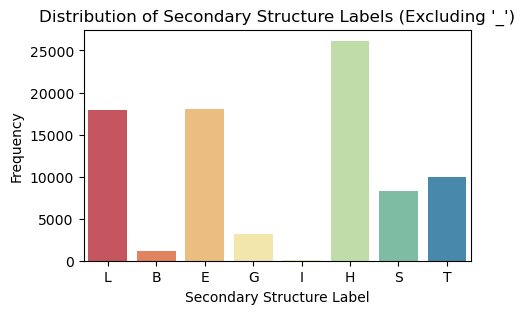

A: 7320
C: 1392
E: 5083
D: 5015
G: 6724
F: 3286
I: 4691
H: 1885
K: 5019
M: 1718
L: 7185
N: 4003
Q: 3130
P: 3940
S: 5255
R: 3841
T: 5054
W: 1244
V: 5834
Y: 3082
X: 64


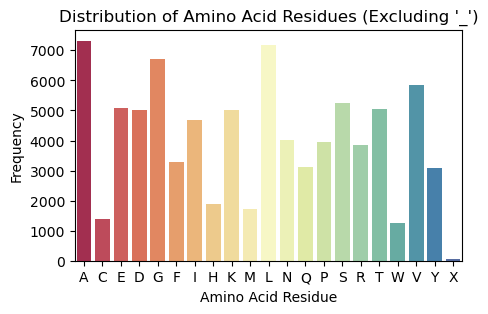

In [45]:
# Visualize the data distribution for secondary structure labels

# Get the secondary structure labels for all proteins
ss_labels = cb513_reshaped[:, :, 22:30]
print(ss_labels.shape)

# Flatten the labels
ss_labels = ss_labels.reshape((-1, 8))
print(ss_labels.shape)

# Count the frequency of each secondary structure label
label_counts = np.sum(ss_labels, axis=0, dtype=int)
# Print the frequency of each secondary structure label
for i, label in enumerate(secondary_structure_labels[:-1]):
    print(f"{label}: {label_counts[i]}")

# Plot the distribution of secondary structure labels excluding '_'
plt.figure(figsize=(5, 3))
sns.barplot(x=secondary_structure_labels[:-1], y=label_counts, palette='Spectral', hue=secondary_structure_labels[:-1])
plt.title("Distribution of Secondary Structure Labels (Excluding '_')")
plt.xlabel("Secondary Structure Label")
plt.ylabel("Frequency")
plt.show()

# Exclude the '_' label from the amino acid residues
filtered_amino_acids = amino_acid_residues[:-1]
filtered_amino_acid_counts = np.sum(cb513_reshaped[:, :, 0:22].reshape((-1, 22)), axis=0, dtype=int)[:-1]
# Print the frequency of each amino acid residue excluding '_'
for i, residue in enumerate(filtered_amino_acids):
    print(f"{residue}: {filtered_amino_acid_counts[i]}")

# Plot the distribution of amino acid residues excluding '_'
plt.figure(figsize=(5, 3))
sns.barplot(x=filtered_amino_acids, y=filtered_amino_acid_counts, palette='Spectral', hue=filtered_amino_acids)
plt.title("Distribution of Amino Acid Residues (Excluding '_')")
plt.xlabel("Amino Acid Residue")
plt.ylabel("Frequency")
plt.show()


In [66]:
# Find the protein containing X amino acid residue
# Find the index of the protein containing 'X' amino acid residue
protein_indices = np.where(np.argmax(cb513_reshaped[:, :, 0:22], axis=-1) == 20)[0]
print(protein_indices)

# Count the frequency of 'X' amino acid residue in each protein
x_counts = np.sum(np.argmax(cb513_reshaped[protein_indices, :, 0:22], axis=-1) == 20, axis=1)
print(x_counts)

# Remove duplicates
protein_indices = np.unique(protein_indices)

# Get the amino acid residues of the protein containing 'X' amino acid residue
for i, index in enumerate(protein_indices):
    protein = cb513_reshaped[index]
    print(f"{i+1}. protein index-{index}: {sequence_profile_to_string(protein)}")

[445 445 445 445 445 445 445 445 445 445 445 445 445 445 445 445 447 447
 447 447 447 447 447 447 447 447 447 447 447 447 447 447 447 447 447 447
 447 447 447 447 447 447 447 447 447 447 447 447 447 447 447 447 447 447
 447 447 447 447 447 447 475 497 509 512]
[16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 44 44 44 44 44 44 44 44
 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44
 44 44 44 44 44 44 44 44 44 44 44 44  1  1  1  1]
1. protein index-445: KEKGDFLALDLGGTNFRVCLVELGGRHFFTMXQKYYIPPEMMMTGTGEELFDFXAXCIADFLEXHHPDXKEPLPLGFTFXFPCEQTXINHGILIXWTXGFDIPXMXKLVQAMXNAXFPRGDXXXDVCAI
2. protein index-447: VTAHSDYEIILEGGSSSWGXVKGRAKVNVPPAIPLXPADCNIKIXAKPDDVRFTCFIESIVDSTKNKLSVEADIANETKDRRIAVGEGEVTVGDFSHRFSFEGSVVNMYYWRSDAVRRNVPNPIYMQGRQFHDIXMKVPLDNNDLIDTWEGFQQSPNFGDWIRDFWFIGPAWTALNEGGQRISPIEVNSEGTEGPXGVTRWRFSHGGSGIVDSISRWTELFPVDKLNKPASIEGGFRSDSQGIEVKVDGELPGVSRDAGGGXRRILNHPXIPLVHHGMVGKFNDFNVDPQXKVVLPKGYKIRYAAPQFRSQWXEEYRWSGGAYARWVEHVCKGGTGQFEILYAQ
3. protein index-475: EH

In [64]:
print(sequence_profile_to_string(cb513_reshaped[475]))

EHYDPVCNKPCKTHDDCSGGWFCQACWNFAGTCGPWV
